In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import joblib

In [257]:
df = pd.read_csv("AmesHousing.csv")
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [258]:
Nulls = df.isnull().sum().sort_values(ascending=False)
Nulls

Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Mas Vnr Type    1775
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64

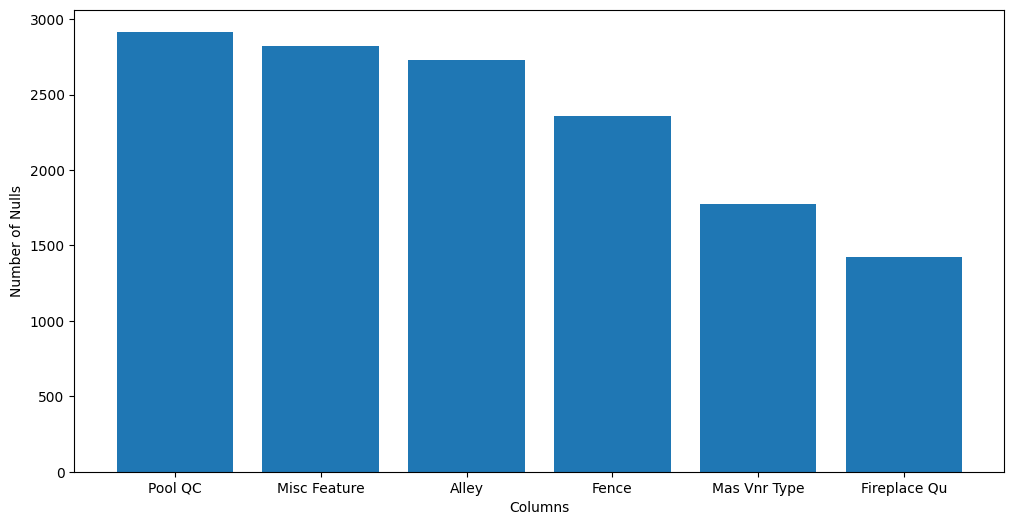

In [259]:
Nulls = Nulls[Nulls > 500]
plt.figure(figsize=(12,6))
plt.bar(Nulls.index, Nulls.values)
plt.xlabel('Columns')
plt.ylabel('Number of Nulls')
plt.show()


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [261]:
df = df.drop(['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Mas Vnr Type', 'Fireplace Qu'], axis=1)

In [262]:
cats = df.select_dtypes(include=['object', 'category']).columns
cats

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [263]:
for i in cats:
    print(i, len(df[i].unique()))

MS Zoning 7
Street 2
Lot Shape 4
Land Contour 4
Utilities 3
Lot Config 5
Land Slope 3
Neighborhood 28
Condition 1 9
Condition 2 8
Bldg Type 5
House Style 8
Roof Style 6
Roof Matl 8
Exterior 1st 16
Exterior 2nd 17
Exter Qual 4
Exter Cond 5
Foundation 6
Bsmt Qual 6
Bsmt Cond 6
Bsmt Exposure 5
BsmtFin Type 1 7
BsmtFin Type 2 7
Heating 6
Heating QC 5
Central Air 2
Electrical 6
Kitchen Qual 5
Functional 8
Garage Type 7
Garage Finish 4
Garage Qual 6
Garage Cond 6
Paved Drive 3
Sale Type 10
Sale Condition 6


In [264]:
encoder = LabelEncoder()
for i in cats:
    df[i] = encoder.fit_transform(df[i])

df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,5,141.0,31770,1,0,3,0,...,0,0,0,0,0,5,2010,9,4,215000
1,2,526350040,20,4,80.0,11622,1,3,3,0,...,0,0,120,0,0,6,2010,9,4,105000
2,3,526351010,20,5,81.0,14267,1,0,3,0,...,0,0,0,0,12500,6,2010,9,4,172000
3,4,526353030,20,5,93.0,11160,1,3,3,0,...,0,0,0,0,0,4,2010,9,4,244000
4,5,527105010,60,5,74.0,13830,1,0,3,0,...,0,0,0,0,0,3,2010,9,4,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,5,37.0,7937,1,0,3,0,...,0,0,0,0,0,3,2006,9,4,142500
2926,2927,923276100,20,5,NaN,8885,1,0,2,0,...,0,0,0,0,0,6,2006,9,4,131000
2927,2928,923400125,85,5,62.0,10441,1,3,3,0,...,0,0,0,0,700,7,2006,9,4,132000
2928,2929,924100070,20,5,77.0,10010,1,3,3,0,...,0,0,0,0,0,4,2006,9,4,170000


In [265]:
corr_matrix = df.corr()
corr_with_y = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_with_y.head(20))

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.432914
Foundation        0.406601
Lot Frontage      0.357318
Wood Deck SF      0.327143
Open Porch SF     0.312951
Half Bath         0.285056
Name: SalePrice, dtype: float64


In [266]:
#Noise Prevention
mainFeatures = corr_with_y[corr_with_y > 0.25].index
df = df[mainFeatures]
df.shape

(2930, 26)

In [267]:
corr_matrix = df.corr()

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    aspect="auto",
    color_continuous_scale="RdBu_r",
    title="Feature Correlation Matrix",
    width=750,
    height=650
)

fig.show()

In [268]:
df = df.drop(['Garage Cars', 'Garage Yr Blt', 'TotRms AbvGrd', 'Foundation', '2nd Flr SF', 'Half Bath', 'Total Bsmt SF'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SalePrice       2930 non-null   int64  
 1   Overall Qual    2930 non-null   int64  
 2   Gr Liv Area     2930 non-null   int64  
 3   Garage Area     2929 non-null   float64
 4   1st Flr SF      2930 non-null   int64  
 5   Year Built      2930 non-null   int64  
 6   Full Bath       2930 non-null   int64  
 7   Year Remod/Add  2930 non-null   int64  
 8   Mas Vnr Area    2907 non-null   float64
 9   Fireplaces      2930 non-null   int64  
 10  BsmtFin SF 1    2929 non-null   float64
 11  Lot Frontage    2440 non-null   float64
 12  Wood Deck SF    2930 non-null   int64  
 13  Open Porch SF   2930 non-null   int64  
 14  Bsmt Full Bath  2928 non-null   float64
 15  Paved Drive     2930 non-null   int64  
 16  Lot Area        2930 non-null   int64  
 17  Central Air     2930 non-null   i

In [269]:
df.isnull().sum()

SalePrice           0
Overall Qual        0
Gr Liv Area         0
Garage Area         1
1st Flr SF          0
Year Built          0
Full Bath           0
Year Remod/Add      0
Mas Vnr Area       23
Fireplaces          0
BsmtFin SF 1        1
Lot Frontage      490
Wood Deck SF        0
Open Porch SF       0
Bsmt Full Bath      2
Paved Drive         0
Lot Area            0
Central Air         0
Roof Style          0
dtype: int64

In [270]:
df['Garage Area'].fillna(df['Garage Area'].mean(), inplace = True)
df['Mas Vnr Area'].fillna(df['Mas Vnr Area'].mean(), inplace = True)
df['Lot Frontage'].fillna(df['Lot Frontage'].mean(), inplace = True)
df['BsmtFin SF 1'].fillna(df['BsmtFin SF 1'].mean(), inplace = True)
df['Bsmt Full Bath'].fillna(df['Bsmt Full Bath'].mean(), inplace = True)

/var/folders/7f/dlpp4c1j37z0hqpqprc0qpy80000gn/T/ipykernel_52269/857100818.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/7f/dlpp4c1j37z0hqpqprc0qpy80000gn/T/ipykernel_52269/857100818.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [271]:
df.isnull().sum()

SalePrice         0
Overall Qual      0
Gr Liv Area       0
Garage Area       0
1st Flr SF        0
Year Built        0
Full Bath         0
Year Remod/Add    0
Mas Vnr Area      0
Fireplaces        0
BsmtFin SF 1      0
Lot Frontage      0
Wood Deck SF      0
Open Porch SF     0
Bsmt Full Bath    0
Paved Drive       0
Lot Area          0
Central Air       0
Roof Style        0
dtype: int64

In [272]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Overall Qual    2930 non-null   int64  
 1   Gr Liv Area     2930 non-null   int64  
 2   Garage Area     2930 non-null   float64
 3   1st Flr SF      2930 non-null   int64  
 4   Year Built      2930 non-null   int64  
 5   Full Bath       2930 non-null   int64  
 6   Year Remod/Add  2930 non-null   int64  
 7   Mas Vnr Area    2930 non-null   float64
 8   Fireplaces      2930 non-null   int64  
 9   BsmtFin SF 1    2930 non-null   float64
 10  Lot Frontage    2930 non-null   float64
 11  Wood Deck SF    2930 non-null   int64  
 12  Open Porch SF   2930 non-null   int64  
 13  Bsmt Full Bath  2930 non-null   float64
 14  Paved Drive     2930 non-null   int64  
 15  Lot Area        2930 non-null   int64  
 16  Central Air     2930 non-null   int64  
 17  Roof Style      2930 non-null   i

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [274]:
Linear_model = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', LinearRegression())
])
Linear_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [275]:
y_pred_Train = Linear_model.predict(X_train)
y_pred_Test = Linear_model.predict(X_test)

In [276]:
print(r2_score(y_train, y_pred_Train))
print(r2_score(y_test, y_pred_Test))

0.8117132992782471
0.8310520327249592


In [277]:
rf_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=15))
])
rf_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=15))])

In [278]:
y_pred_Train = rf_model.predict(X_train)
y_pred_Test = rf_model.predict(X_test)

In [279]:
print(r2_score(y_train, y_pred_Train))
print(r2_score(y_test, y_pred_Test))

0.9818975674917764
0.9034215333084095


In [280]:
tree_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth = 5, random_state=15))
])
tree_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor(max_depth=5, random_state=15))])

In [281]:
y_pred_Train = tree_model.predict(X_train)
y_pred_Test = tree_model.predict(X_test)

In [282]:
print(r2_score(y_train, y_pred_Train))
print(r2_score(y_test, y_pred_Test))

0.8565177867232062
0.8382485242289123


In [283]:
models = {
    "Linear Regression": Linear_model,
    "Decision Tree Regression": tree_model,
    "Random Forest Regression": rf_model
}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print('----------',model_name, "----------")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Root Mean Squared Error", root_mean_squared_error(y_test, y_pred))
    print()

---------- Linear Regression ----------
R2 Score: 0.8310520327249592
Mean Absolute Error: 22588.144685258263
Root Mean Squared Error 36804.19032470454

---------- Decision Tree Regression ----------
R2 Score: 0.8382485242289123
Mean Absolute Error: 25019.129335632602
Root Mean Squared Error 36011.806534659736

---------- Random Forest Regression ----------
R2 Score: 0.9034215333084095
Mean Absolute Error: 16695.532868411075
Root Mean Squared Error 27826.65063915177



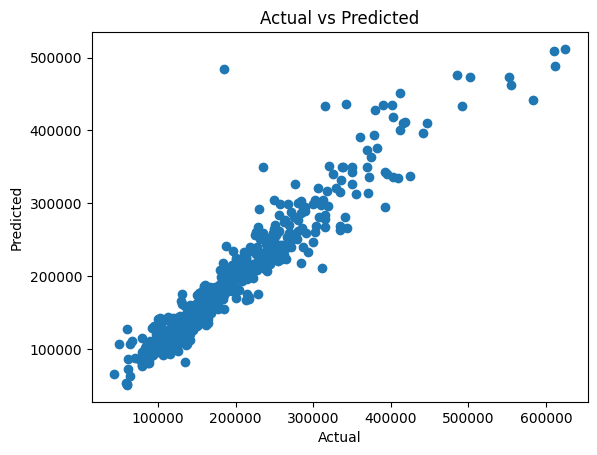

In [286]:
# Taking Random Forest Model as the final Model as highest r2_score
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [288]:
joblib.dump(rf_model, 'rf_model.jb')

['rf_model.jb']

In [290]:
df.columns

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area', '1st Flr SF',
       'Year Built', 'Full Bath', 'Year Remod/Add', 'Mas Vnr Area',
       'Fireplaces', 'BsmtFin SF 1', 'Lot Frontage', 'Wood Deck SF',
       'Open Porch SF', 'Bsmt Full Bath', 'Paved Drive', 'Lot Area',
       'Central Air', 'Roof Style'],
      dtype='object')